<h3>Для начала импортируем <b>pandas</b> для работы с таблицей и <b>datetime</b> для перевода дат в формат <b>Timestamp</b>, читаем наш файл и переводим даты в нужный формат, проверяем таблицу.</h3>

In [140]:
import pandas as pd
import datetime
df = pd.read_csv('data.csv', index_col=0)
df['visit_date'] = pd.to_datetime(df['visit_date'])
df['install_date'] = pd.to_datetime(df['install_date'])
df

,customer_user_id,platform,media_source,campaign,install_date,cpi,visit_date,revenue
0,241706,android,unityads_int,HC|Android|retention|US,2020-09-14,0.958889,2020-09-22,0.034333
1,241143,android,unityads_int,HC|Android|retention|US,2020-09-14,0.984545,2020-09-14,0.121975
2,242764,android,unityads_int,HC|Android|retention|US,2020-09-15,1.002273,2020-09-16,0.177648
3,242947,android,unityads_int,HC|Android|retention|US,2020-09-15,1.054444,2020-09-22,0.043012
4,242947,android,unityads_int,HC|Android|retention|US,2020-09-15,1.054444,2020-09-24,0.045508
...,...,...,...,...,...,...,...,...
4764,232020,android,unityads_int,HC|Android|retention|US,2020-09-10,0.970000,2020-09-17,0.208614
4765,233347,android,unityads_int,HC|Android|retention|US,2020-09-11,0.984615,2020-09-15,0.123799
4766,231925,android,unityads_int,HC|Android|retention|US,2020-09-10,0.973077,2020-09-18,0.548810
4767,231069,android,unityads_int,HC|Android|retention|US,2020-09-10,0.973077,2020-09-16,0.112256


<h3>Так как каждая строка в нашей таблице - выручка отдельного пользователя в день игры и <b>visit_date</b> и <b>customer_user_id</b> у нас повторятся - создадим 2 списка с уникальными и отсортированными значениями и создадим таблицу, куда позже внесем данные по выручке от каждого пользователя по визиту в опр. день.</h3>

In [141]:
user_ids = df.customer_user_id.sort_values().unique()
visit_dates = df.visit_date.sort_values().unique()
date_list = visit_dates
total = pd.DataFrame(columns = date_list, index=user_ids)
total

,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,...,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30
175552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Далее выберем из оригинальной таблицы колонки, с помощью которых будем вставлять данные в нашу таблицу.</h3>

In [142]:
revs = df[['customer_user_id', 'visit_date', 'revenue']]
revs

,customer_user_id,visit_date,revenue
0,241706,2020-09-22,0.034333
1,241143,2020-09-14,0.121975
2,242764,2020-09-16,0.177648
3,242947,2020-09-22,0.043012
4,242947,2020-09-24,0.045508
...,...,...,...
4764,232020,2020-09-17,0.208614
4765,233347,2020-09-15,0.123799
4766,231925,2020-09-18,0.548810
4767,231069,2020-09-16,0.112256


<h3>Вставляем наши данные в таблицу, после заменяем значения <b>NaN</b> на нули.</h3>

In [143]:
import numpy as np
for row in range(len(revs)):
    total.at[revs['customer_user_id'].iloc[row], revs['visit_date'].iloc[row]] = revs['revenue'].iloc[row]
for row in total.index:
    for column in total.columns:
        if np.isnan(total[column].loc[row]):
            total.at[row, column] = 0
total

,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,...,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30
175552,0.105317,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175555,0.018973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175600,0.043757,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175630,0.098686,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175652,0.163873,0.033173,0.290392,0.288956,0.285476,0.109673,0,0.623671,0.328915,0.388565,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.101467,0.07595,0,0,0,0,0
248028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249747,0,0,0,0,0,0,0,0,0,0,...,0.063962,0,0,0,0.112201,0.025569,0,0,0,0


<h3>Испортируем <b>matplotlib</b> для визуальной проверки нашей выручки по дням и строим график.</h3>

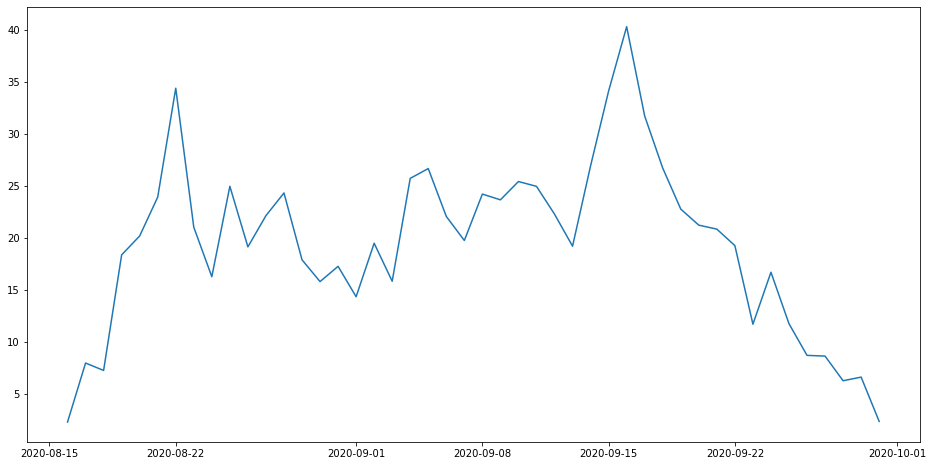

In [162]:
import matplotlib.pyplot as plt
daily_income = []
for column in total.columns:
    daily_income.append(sum(total[column]))
plt.figure(figsize=[16,8])
plt.plot(total.columns, daily_income)

<h3>В задании сказано что оно создано для проверки умения манипулирования данными, поэтому предположим что ситуация с выручкой будет повторяться как есть. (Авторегрессия с большим лагом = 1)</h3>

In [163]:
time_delta = (max(df.visit_date)-min(df.install_date)).days
user_cpi = df[['customer_user_id', 'cpi']].drop_duplicates()
current_rev = sum(daily_income)
required_rev = sum(user_cpi.cpi)
print('Выручка на данный момент: {}'.format(round(current_rev, 2)))
print('Требуемая выручка: {}'.format(round(required_rev,2)))

Выручка на данный момент: 894.08
Требуемая выручка: 1235.14


<h3>Так как нам не хватает около 300 единиц для окупаемости - продолжим ситуацию с выручкой и посмотрим на какой день наша рекламная кампания окупится. И проверим на какой день у нас наступит окупаемость.</h3>

In [164]:
daily_income_2 = daily_income + daily_income
for n in range(len(daily_income_2)):
    if sum(daily_income_2[:n]) >= required_rev:
        print("Окупаемость наступит на {} или через {} дней".format(datetime.datetime.date(max(df.visit_date)+datetime.timedelta(days=n-time_delta)), n-time_delta))
        break

Окупаемость наступит на 2020-10-20 или через 20 дней


<h3>Также попробуем посмотреть на окупаемость через линейную регрегрессию (хотя предсказывать временные ряды таким способом - не очень верно)</h3>

In [165]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(np.array(range(len(daily_income))).reshape(-1, 1), np.array(daily_income).reshape(-1, 1))

LinearRegression()

In [166]:
daily_income.extend(LR.predict(np.array(range(len(daily_income), len(daily_income)*2)).reshape(-1, 1)))
for n in range(len(daily_income)):
    if sum(daily_income[:n]) >= required_rev:
        print("Окупаемость наступит на {} или через {} день".format(datetime.datetime.date(max(df.visit_date)+datetime.timedelta(days=n-time_delta)), n-time_delta))
        break

Окупаемость наступит на 2020-10-21 или через 21 день
